In [1]:
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np

import seaborn as sb

import matplotlib.pyplot as plt
%matplotlib inline

/Users/OldMacBook/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
# READ IN BIMBO_TABLE
df = pd.read_csv('Datasets/Bimbo_Table.csv', low_memory=False)

In [ ]:
df['Adjusted_Demand'].plot(kind='bar')

In [1]:
p = sb.factorplot(x='Client_Name', 
              y='Adjusted_Demand',
              kind='bar',
              data = df,
             size = 7)
p.set_xticklabels(rotation=45, horizontalalignment='right')

NameError: name 'sb' is not defined

In [ ]:
df.State.value_counts()

In [3]:
z = df['State'].apply(lambda x: 0 if x == "MÉXICO, D.F." else 1)

In [ ]:
z.head()

In [ ]:
r = sb.factorplot(x=z, 
              y='Adjusted_Demand',
              kind='bar',
              data = df,
             size = 7)
r.set_xticklabels(rotation=45, horizontalalignment='right')

In [ ]:
df.groupby('Client_Name').Adjusted_Demand.bar()

In [ ]:
df.Adjusted_Demand.value_counts()

In [ ]:
df.head()

In [ ]:
df.describe()

In [11]:
X = df[[ 'Depot_1110', 'Depot_1111', 'Depot_1112', 'Depot_1113', 'Depot_1114', 'Depot_1116', 'Depot_1117', \
        'Weekly_Sales_Units', 'State_Mexico_City', 'Bimbo Store', 'Eatery', 'Fresh Market', \
        'General Market/Mart', 'Govt Store', 'Hospital/Pharmacy', 'Hotel', 'Individual', 'NO IDENTIFICADO', \
         'Post', 'School', 'Small Franchise', 'Supermarket', 'Walmart']]

In [12]:
y = df['Adjusted_Demand'].apply(lambda x: 8 if x >= 8 else x)

In [13]:
y.value_counts()

8    65959
2    45327
1    32249
3    31988
4    25032
5    23866
6    15781
7     7663
0     3327
Name: Adjusted_Demand, dtype: int64

In [14]:
w = df['Adjusted_Demand'].apply(lambda x: 1 if x >= 4 else 0)

In [15]:
w.value_counts()

1    138301
0    112891
Name: Adjusted_Demand, dtype: int64

In [16]:
from sklearn import grid_search, cross_validation
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [17]:
X2 = df[['Depot_1111', 'Depot_1112', 'Depot_1113', 'Depot_1114', 'Depot_1116', 'Depot_1117', \
        'Weekly_Sales_Units', 'State_Mexico_City', 'Walmart']]

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [19]:
#  Logistic Regression: SK Learn
lm.fit(X2, w)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
#  Logistic Regression Score: SK Learn
print lm.score(X2, w)

0.994534061594


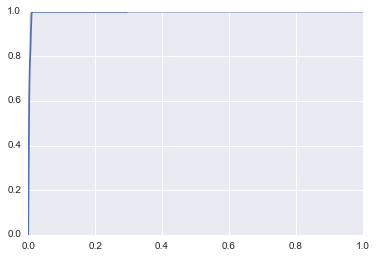

In [41]:
#  Logistic Regression ROC Curve: SK Learn
actuals = lm.predict(X2) 
probas = lm.predict_proba(X2)
plt.plot(roc_curve(w, probas[:,1])[0], roc_curve(w, probas[:,1])[1])

In [42]:
#  Logistic Regression AUC Score: SK Learn

roc_auc_score(w, lm.predict(X2))


0.99407108384292708

In [23]:
#  Logistic Regression Coef, Intercepts, Adjusted Demand Mean: SK Learn

print lm.coef_
print lm.intercept_
print w.mean()

[[-0.1388751  -0.34011023 -0.48261292 -0.16747438 -0.16568719 -4.12890493
   3.45209682 -0.29713258 -0.32090906]]
[-11.9084766]
0.55057884009


In [24]:
print lm.

SyntaxError: invalid syntax (<ipython-input-24-5e785a20882a>, line 1)

In [25]:

print np.exp(lm.coef_)
print np.exp(lm.intercept_)
print w.mean()

[[  8.70336724e-01   7.11691868e-01   6.17168671e-01   8.45798282e-01
    8.47311241e-01   1.61005004e-02   3.15665124e+01   7.42945503e-01
    7.25489224e-01]]
[  6.73308850e-06]
0.55057884009


In [26]:
def sigmoid_func(logit):
    # uses a float (logit) and returns back the probability
    return 1. / (1 + np.exp(-logit))

In [27]:
sigmoid_func(lm.coef_)

array([[ 0.46533692,  0.4157827 ,  0.38163531,  0.45822899,  0.4586727 ,
         0.01584538,  0.96929361,  0.4262586 ,  0.42045422]])

In [ ]:
def odds_ratio(probs):
    return 

In [ ]:
#Accuracy

In [35]:
from sklearn import dummy, metrics

In [36]:
# Dummy Model
model0 = dummy.DummyClassifier()
model0.fit(X2, w)
df['probability_0'] = model0.predict_proba(X2).T[1]


In [37]:
df['probability_1'] = lm.predict_proba(X2).T[1]

[(0, 1),
 (0, 1),

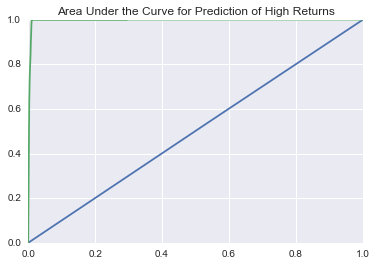

In [43]:
ax = plt.subplot(111)
vals = metrics.roc_curve(w, df.probability_0)
ax.plot(vals[0], vals[1])
vals = metrics.roc_curve(w, df.probability_1)
ax.plot(vals[0], vals[1])

ax.set(title='Area Under the Curve for Prediction of High Returns', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

[(0, 1),
 (0, 1),

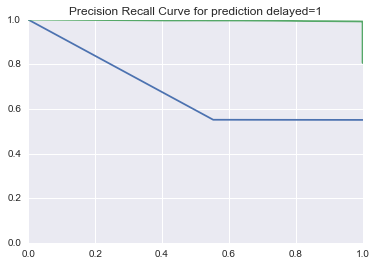

In [39]:
ax = plt.subplot(111)
for i in range(2):
    vals = metrics.precision_recall_curve(w, df['probability_' + str(i)])
    ax.plot(vals[1], vals[0])

ax.set(title='Precision Recall Curve for prediction delayed=1', ylabel='', xlabel='', xlim=(0, 1), ylim=(0, 1))

In [40]:
# Coefficients represent the log-odds. This includes the y-intercept. 


In [28]:
import statsmodels.formula.api as smf

In [29]:

lm_2 = smf.Logit(w, X2).fit()

lm_2.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Adjusted_Demand   No. Observations:               251192
Model:                          Logit   Df Residuals:                   251183
Method:                           MLE   Df Model:                            8
Date:                Wed, 21 Sep 2016   Pseudo R-squ.:                    -inf
Time:                        06:13:42   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                   -1.7283e+05
                                        LLR p-value:                     1.000
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Depot_1111            -6.5651      0.045   -145.252      0.000        -6.654    -6.477
Depot_1112            -7.7400      0.044   -174.724      0.000        -7.827    -7.653
Depot_1113            -8.8934      0.051   -175.996      0.000        -8.992    -8.794
Depot_1114            -6.5452      0.068    -96.342      0.000        -6.678    -6.412
Depot_1116            -6.8199      0.044   -155.705      0.000        -6.906    -6.734
Depot_1117           -10.7049      0.128    -83.826      0.000       -10.955   -10.455
Weekly_Sales_Units     2.4798      0.013    196.680      0.000         2.455     2.504
State_Mexico_City     -2.3605      0.030    -78.561      0.000        -2.419    -2.302
Walmart               -2.2708      0.653     -3.479      0.001        -3.550    -0.991
======================================================================================
"""

In [33]:
print lm_2.summary()

                           Logit Regression Results                           
Dep. Variable:        Adjusted_Demand   No. Observations:               251192
Model:                          Logit   Df Residuals:                   251183
Method:                           MLE   Df Model:                            8
Date:                Wed, 21 Sep 2016   Pseudo R-squ.:                    -inf
Time:                        06:21:30   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                   -1.7283e+05
                                        LLR p-value:                     1.000
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Depot_1111            -6.5651      0.045   -145.252      0.000        -6.654    -6.477
Depot_1112            -7.7400      0.044   -174.724      0.000        -7.827    -7.653
Depot_1113          

In [34]:
params = lm_2.params
conf = lm_2.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf.OR)

Depot_1111             0.001409
Depot_1112             0.000435
Depot_1113             0.000137
Depot_1114             0.001437
Depot_1116             0.001092
Depot_1117             0.000022
Weekly_Sales_Units    11.938657
State_Mexico_City      0.094370
Walmart                0.103233
Name: OR, dtype: float64


In [31]:
params = np.exp(lm_2.params)

In [32]:
print params

Depot_1111             0.001409
Depot_1112             0.000435
Depot_1113             0.000137
Depot_1114             0.001437
Depot_1116             0.001092
Depot_1117             0.000022
Weekly_Sales_Units    11.938657
State_Mexico_City      0.094370
Walmart                0.103233
dtype: float64


In [ ]:
print lm.score(X2, w)

In [ ]:
actuals = lm.predict(X2) 
probas = lm.predict_proba(X2)
plt.plot(roc_curve(w, probas[:,1])[0], roc_curve(w, probas[:,1])[1])

In [ ]:
actuals = lm.predict(X2) 
probas = lm.predict_proba(X2)
plt.plot(roc_curve(w, probas[:,1])[0], roc_curve(w, probas[:,1])[1])

In [ ]:
# Grid Search Metho